# Imports

In [1]:
import librosa
import librosa.display
import wave
import contextlib
import IPython
import contextlib
from scipy.io import wavfile
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from vscode_audio import Audio
import numpy as np
from prepare_data import augment_wav

/usr/local/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Sample Track

In [2]:
track = "pop/pop.00094.wav"

In [31]:
file_path = "../.data/genres/" + track

In [32]:
# This won't work in VSCode.
IPython.display.Audio(file_path)

In [33]:
wav, sr = librosa.load(file_path, sr=None)

In [38]:
augmented_wav = augment_wav(wav, sr)

In [ ]:
# Workaround to play WAV files in VSCode.
Audio(wav, sr)

In [ ]:
Audio(augmented_wav, sr)

In [38]:
with open(os.path.join(os.getcwd(), file_path), "r") as f, contextlib.closing(
    wave.open(file_path, "r")
) as wf:
    frames = wf.getnframes()
    rate = wf.getframerate()
    duration = frames / float(rate)
    print("Frames:", frames)
    print("Rate:", rate)
    print("Duration:", duration)

Frames: 661504
Rate: 22050
Duration: 30.00018140589569


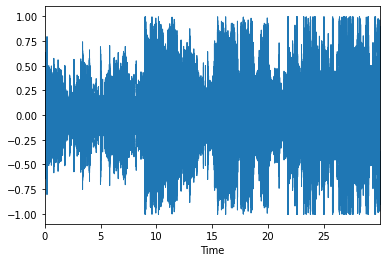

In [39]:
librosa.display.waveplot(wav)

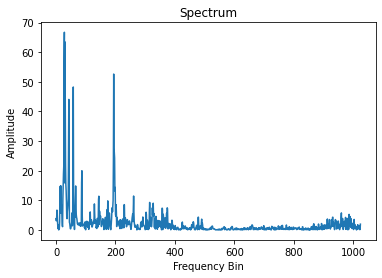

In [44]:
n_fft = 2048
ft = np.abs(librosa.stft(wav[:n_fft], hop_length=n_fft + 1))
plt.plot(ft)
plt.title("Spectrum")
plt.xlabel("Frequency Bin")
plt.ylabel("Amplitude");

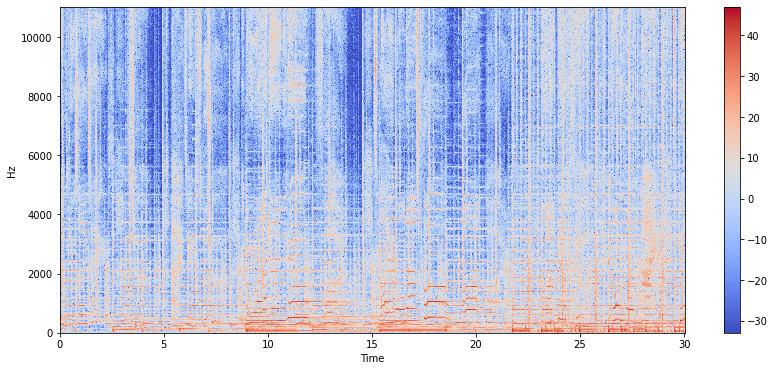

In [40]:
stft = librosa.stft(wav)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()

In [43]:
stft_db.shape

(1025, 1293)

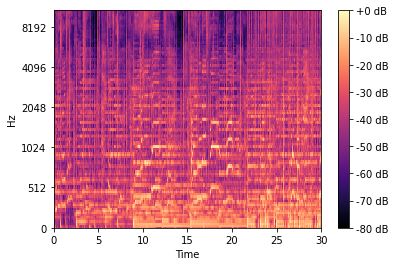

In [41]:
n_fft = 2048
hop_length = 512
n_mels = 128

S = librosa.feature.melspectrogram(
    wav, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels
)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(
    S_DB, sr=sr, hop_length=hop_length, x_axis="time", y_axis="mel"
)
plt.colorbar(format="%+2.0f dB")

In [28]:
S_DB.shape

NameError: name 'S_DB' is not defined

# Read Data CSV

In [6]:
audio_df = pd.read_csv("../.data/data.csv")

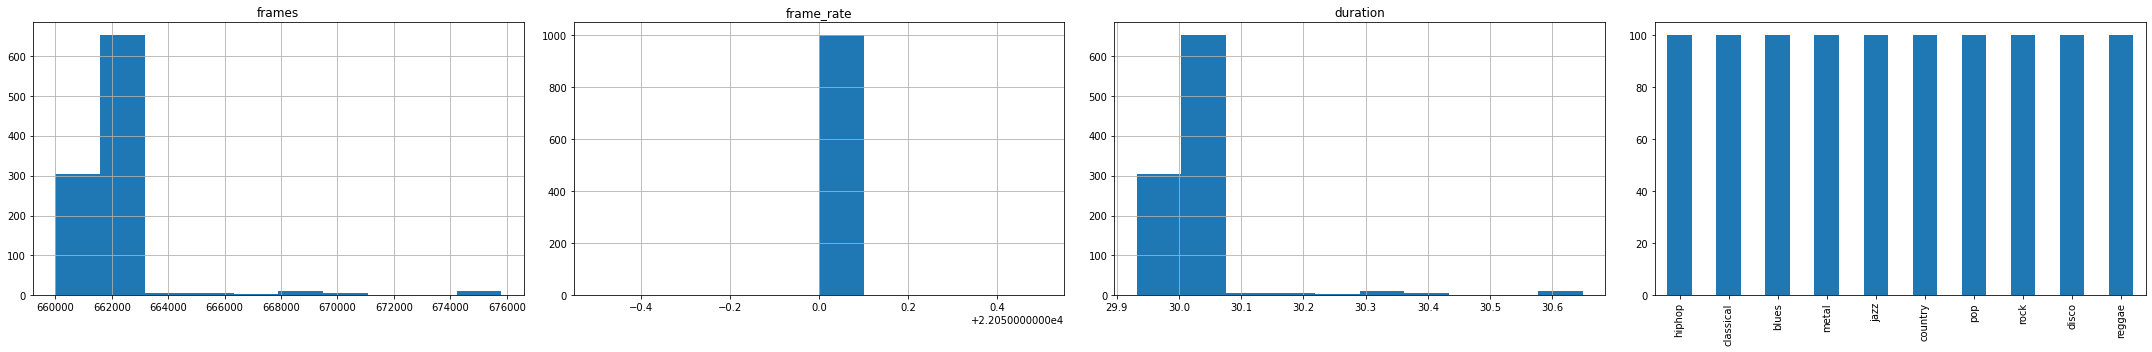

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(30, 5))

audio_df.hist(column="frames", ax=axes[0])
audio_df.hist(column="frame_rate", ax=axes[1])
audio_df.hist(column="duration", ax=axes[2])
audio_df["genre"].value_counts().plot(kind="bar", ax=axes[3])

plt.tight_layout()

plt.show()